In [17]:
import tensorflow.keras.applications.vgg16 as vgg16
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [22]:
cv2.imwrite("file.png", cv2.resize(cv2.imread("file.jpg"), (224,224)))

True

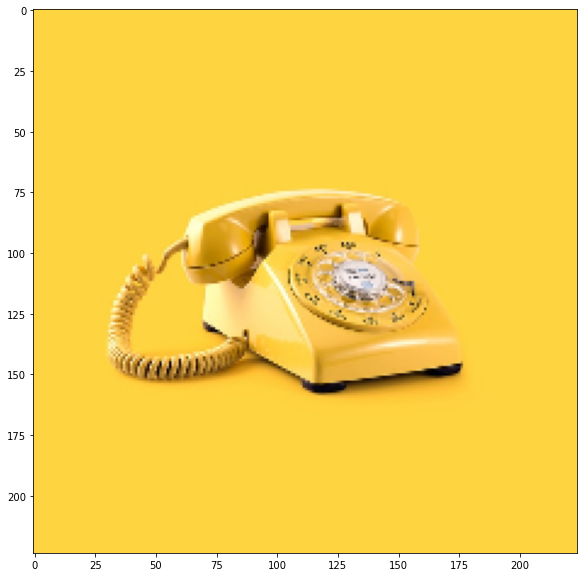

In [23]:
image = tf.image.decode_png(tf.io.read_file('file.png'))
plt.figure(figsize=(10,10))
plt.imshow(image.numpy())

In [24]:
model = vgg16.VGG16(weights="imagenet")

In [28]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
result = model(tf.expand_dims(image, axis=0))

In [41]:
import requests, pandas as pd
classes = pd.read_html(requests.get("https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/").content)[0]["Class Name"]
classes

0                                     tench, Tinca tinca
1                            goldfish, Carassius auratus
2      great white shark, white shark, man-eater, man...
3                        tiger shark, Galeocerdo cuvieri
4                           hammerhead, hammerhead shark
                             ...                        
995                                            earthstar
996    hen-of-the-woods, hen of the woods, Polyporus ...
997                                               bolete
998                                ear, spike, capitulum
999         toilet tissue, toilet paper, bathroom tissue
Name: Class Name, Length: 1000, dtype: object

In [42]:
classes[np.argmax(result[0])]

'iron, smoothing iron'

'combination lock'

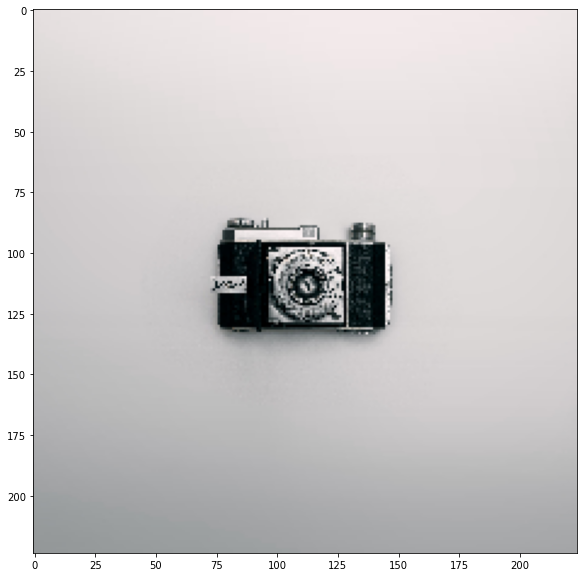

In [45]:
def predict(url):
    cv2.imwrite(url.replace(".jpg", ".png"), cv2.resize(cv2.imread(url), (224,224)))
    image = tf.image.decode_png(tf.io.read_file(url.replace(".jpg", ".png")))
    plt.figure(figsize=(10,10))
    plt.imshow(image.numpy())
    model = vgg16.VGG16(weights="imagenet")
    result = model(tf.expand_dims(image, axis=0))
    classes = pd.read_html(requests.get("https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/").content)[0]["Class Name"]
    return classes[np.argmax(result[0])]

predict("camera.jpg")